In [1]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import pytesseract

input_size = 56
def cropped_roi(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            box = cv2.resize(box, (input_size, input_size))
            box = box/255.0
            boxes.append(box)
    return boxes


board = cv2.imread('suduku3.jpg')
board = cv2.resize(board, (900, 900))
rois = cropped_roi(board)
print(len(rois))

81


(368, 490, 3)


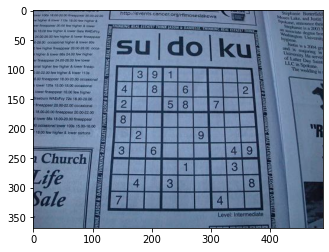

In [2]:
img = cv2.imread('sudoku1.jpg')
print(img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

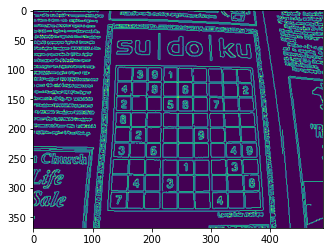

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(edged)

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours  = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 30, True)
    if len(approx) == 4:
        location = approx
        break
newimg = gray[location[0][0][1]:location[1][0][1], location[0][0][0]:location[3][0][0]]
location

array([[[140,  93]],

       [[126, 338]],

       [[389, 336]],

       [[370,  98]]], dtype=int32)

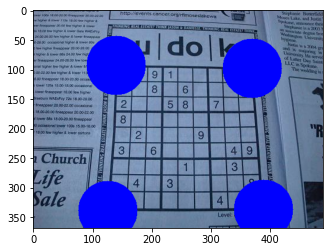

In [6]:
p = cv2.circle(img, tuple(location[0][0]), 50, [0, 0, 255], -1)
p = cv2.circle(p, tuple(location[1][0]), 50, [0, 0, 255], -1)
p = cv2.circle(p, tuple(location[2][0]), 50, [0, 0, 255], -1)
p = cv2.circle(p, tuple(location[3][0]), 50, [0, 0, 255], -1)
plt.imshow(p)

In [7]:
h, w = 600, 600
pts1 = np.float32([location[0], location[3], location[1], location[2]])
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, matrix, (w, h))

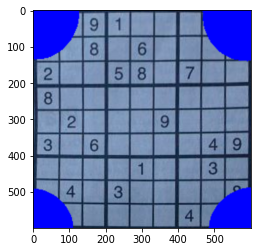

In [8]:
plt.imshow(result)

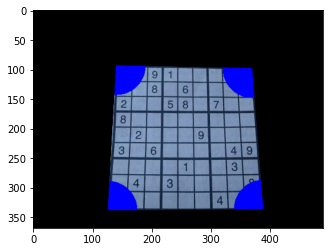

In [11]:
r = get_InvPerspective(img, result, location)
plt.imshow(r)

In [34]:
n = np.arange(1, 82)

In [35]:
blank = np.zeros_like(result)
blank.shape

(600, 600, 3)

In [54]:
def displayNumbers(img, numbers, color=(0, 255, 0)):
    W = int(img.shape[1]/9)
    H = int(img.shape[0]/9)
    for i in range (9):
        for j in range (9):
            if numbers[(j*9)+i] !=0:
                cv2.putText(img, str(numbers[(j*9)+i]), (i*W+int(W/2)-10, int((j+0.8)*H)), cv2.FONT_HERSHEY_COMPLEX, 2, color, 2, cv2.LINE_AA)
                plt.imshow(img)
    return img

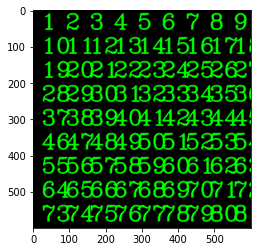

In [55]:
plt.imshow(i)

In [47]:
np.asarray(n)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [53]:
bin_arr = np.where(n>0, 0, 1)
n*bin_arr, bin_arr

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [75]:
def get_perspective(img, location, height = 600, width = 600):
    pts1 = np.float32([location[0], location[3], location[1], location[2]])
    pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(img, matrix, (width, height))
    return result

In [10]:
def get_InvPerspective(img, masked_num, location, height = 600, width = 600):
    """Takes original image as input"""
    pts1 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
    pts2 = np.float32([location[0], location[3], location[1], location[2]])

    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(masked_num, matrix, (img.shape[1], img.shape[0]))
    return result

In [92]:
def find_board(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours  = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 15, True)
        if len(approx) == 4:
            location = approx
            break
    result = get_perspective(img, location)
    return result, gray

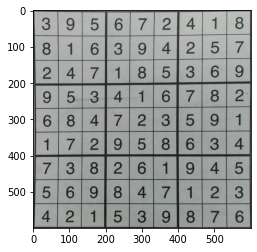

In [156]:
i = find_board(cv2.imread('sudoku6.jpg'))
plt.imshow(i)